# 支持向量机SVM（上）

## 1 概述

![image.png](./images/175.png)

![image.png](./images/176.png)

![image.png](./images/177.png)

![image.png](./images/178.png)

### 1.1支持向量机分类器是如何工作的

![image.png](./images/179.png)

![image.png](./images/180.png)

![image.png](./images/181.png)

![image.png](./images/182.png)

![image.png](./images/183.png)

![image.png](./images/184.png)

https://www.csie.ntu.edu.tw/~cjlin/libsvm/

## 2 sklearn.svm.SVC

class sklearn.svm.SVC (C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True,
probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1,
decision_function_shape=’ovr’, random_state=None)

### 2.1 线性SVM用于分类的原理 

#### 2.1.1 线性SVM的损失函数详解

![image.png](./images/185.png)

![image.png](./images/186.png)

![image.png](./images/187.png)

![image.png](./images/188.png)

![image.png](./images/189.png)

![image.png](./images/190.png)

![image.png](./images/191.png)

![image.png](./images/192.png)

![image.png](./images/193.png)

#### 2.1.2 函数间隔与几何间隔

![image.png](./images/194.png)

#### 2.1.3 线性SVM的拉格朗日对偶函数和决策函数

![image.png](./images/195.png)

![image.png](./images/196.png)

![image.png](./images/197.png)

![image.png](./images/198.png)

![image.png](./images/199.png)

![image.png](./images/200.png)

![image.png](./images/201.png)

![image.png](./images/202.png)

![image.png](./images/203.png)

注：这里可以后面下来看一下！！！

#### 2.1.4 线性SVM决策过程的可视化

我们可以使用sklearn中的式子来为可视化我们的决策边界，支持向量，以及决策边界平行的两个超平面。

**1. 导入需要的模块**

In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

**2. 实例化数据集，可视化数据集**

In [2]:
X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)

In [3]:
X.shape

(50, 2)

In [4]:
y.shape

(50,)

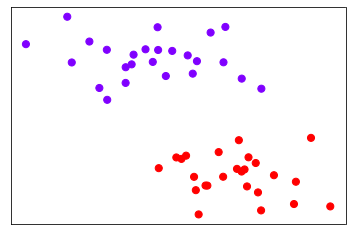

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

**3. 画决策边界：理解函数contour**

![image.png](./images/204.png)

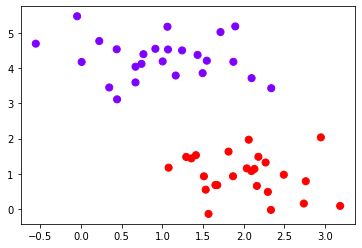

In [6]:
#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

有了这个平面，我们需要在平面上制作一个足够细的网格，来代表我们“平面上的所有点”。

**4. 画决策边界：制作网格，理解函数meshgrid**

In [7]:
#获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [8]:
xlim

(-0.7425578984849813, 3.3721920271976598)

In [9]:
ylim

(-0.41872382476349596, 5.754870487889891)

In [10]:
#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)

In [12]:
axisx.shape

(30,)

In [13]:
axisy,axisx = np.meshgrid(axisy,axisx)
#我们将使用这里形成的二维数组作为我们contour函数中的X和Y
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标

In [15]:
axisx.shape

(30, 30)

In [16]:
axisy.shape

(30, 30)

In [17]:
axisx.ravel().shape

(900,)

In [18]:
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点

In [19]:
xy.shape

(900, 2)

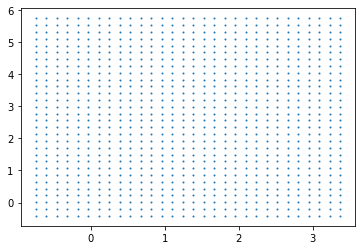

In [20]:
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")

In [21]:
#理解函数meshgrid和vstack的作用
a = np.array([1,2,3])
b = np.array([7,8])
#两两组合，会得到多少个坐标？
#答案是6个，分别是 (1,7),(2,7),(3,7),(1,8),(2,8),(3,8)
v1,v2 = np.meshgrid(a,b)

In [22]:
v1

array([[1, 2, 3],
       [1, 2, 3]])

In [23]:
v2

array([[7, 7, 7],
       [8, 8, 8]])

In [24]:
v1.ravel()

array([1, 2, 3, 1, 2, 3])

In [25]:
v2.ravel()

array([7, 7, 7, 8, 8, 8])

In [26]:
v = np.vstack([v1.ravel(), v2.ravel()]).T

In [27]:
v

array([[1, 7],
       [2, 7],
       [3, 7],
       [1, 8],
       [2, 8],
       [3, 8]])

有了网格后，我们需要计算网格所代表的“平面上所有的点”到我们的决策边界的距离。所以我们需要我们的模型和
决策边界。

**5.建模，计算决策边界并找出网格上每个点到决策边界的距离**

In [29]:
X.shape

(50, 2)

In [31]:
y.shape

(50,)

In [32]:
#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致

In [33]:
Z.shape

(30, 30)

(-0.41872382476349596, 5.754870487889891)

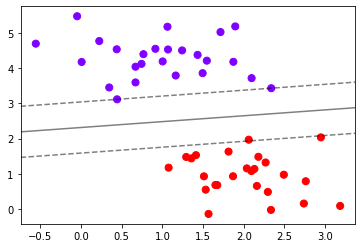

In [36]:
#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5
           ,linestyles=["--","-","--"])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [37]:
X[10]

array([1.71444449, 5.02521524])

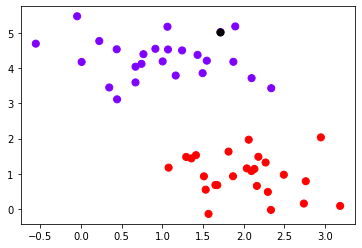

In [38]:
#记得Z的本质么？是输入的样本到决策边界的距离，而contour函数中的level其实是输入了这个距离
#让我们用一个点来试试看
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=50,cmap="rainbow")

In [39]:
clf.decision_function(X[10].reshape(1,2))

array([-3.33917354])

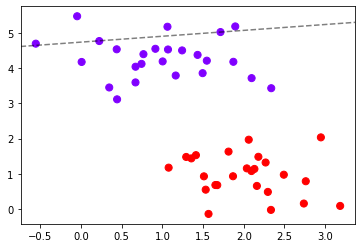

In [40]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-3.33917354]
           ,alpha=0.5
           ,linestyles=["--"])

**6. 将绘图过程包装成函数**

In [41]:
#将上述过程包装成函数：
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

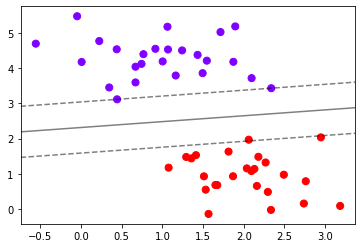

In [42]:
#则整个绘图过程可以写作：
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

**7.探索建好的模型**

In [43]:
clf.predict(X)
#根据决策边界，对X中的样本进行分类，返回的结构为n_samples

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [44]:
clf.score(X,y)
#返回给定测试数据和标签的平均准确度

1.0

In [45]:
clf.support_vectors_
#返回支持向量

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [46]:
clf.n_support_
#返回每个类中支持向量的个数

array([2, 1])

**8. 推广到非线性情况**

我们之前所讲解的原理，以及绘图的过程，都是基于数据本身是线性可分的情况。如果把数据推广到非线性数据，
比如说环形数据上呢？

In [47]:
from sklearn.datasets import make_circles

In [48]:
X,y = make_circles(100, factor=0.1, noise=.1)

In [49]:
X.shape

(100, 2)

In [50]:
y.shape

(100,)

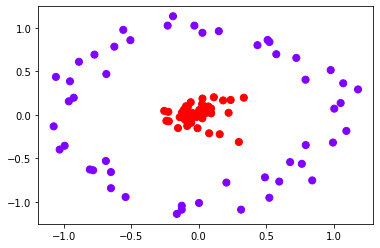

In [51]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.show()

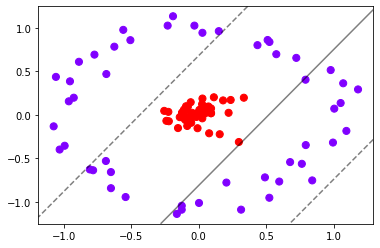

In [52]:
#则整个绘图过程可以写作：
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [53]:
clf.score(X,y)

0.71

明显，现在线性SVM已经不适合于我们的状况了，我们无法找出一条直线来划分我们的数据集，让直线的两边分别
是两种类别。这个时候，如果我们能够在原本的X和y的基础上，添加一个维度r，变成三维，我们可视化这个数
据，来看看添加维度让我们的数据如何变化。

**9. 为非线性数据增加维度并绘制3D图像**

In [54]:
#定义一个由x计算出来的新维度r
r = np.exp(-(X**2).sum(1))

In [57]:
r.shape

(100,)

In [56]:
rlim = np.linspace(min(r),max(r),100)

In [58]:
rlim.shape

(100,)

In [59]:
from mpl_toolkits import mplot3d

In [60]:
#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

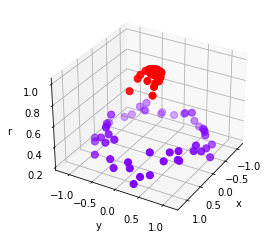

In [61]:
plot_3D()

可以看见，此时此刻我们的数据明显是线性可分的了：我们可以使用一个平面来将数据完全分开，并使平面的上方
的所有数据点为一类，平面下方的所有数据点为另一类。

**10. 将上述过程放到Jupyter Notebook中运行**

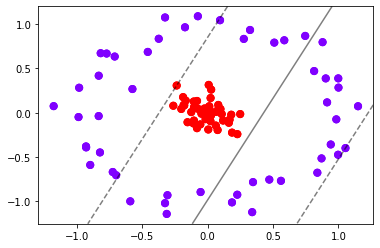

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 60, 90, 120, 150, 180), value=30),…

In [1]:
#如果放到jupyter notebook中运行
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r),100)
from mpl_toolkits import mplot3d
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30,60,90,120,150,180],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()

此时我们的数据在三维空间中，我们的超平面就是一个二维平面。明显我们可以用一个平面将两类数据隔开，这个
平面就是我们的决策边界了。我们刚才做的，计算r，并将r作为数据的第三维度来将数据升维的过程，被称为“核变
换”，即是将数据投影到高维空间中，以寻找能够将数据完美分割的超平面，即是说寻找能够让数据线性可分的高
维空间。为了详细解释这个过程，我们需要引入SVM中的核心概念：核函数。

### 2.2 非线性SVM与核函数

#### 2.2.1 SVC在非线性数据上的推广

![image.png](./images/205.png)

#### 2.2.2 重要参数kernel

![image.png](./images/206.png)

![image.png](./images/207.png)

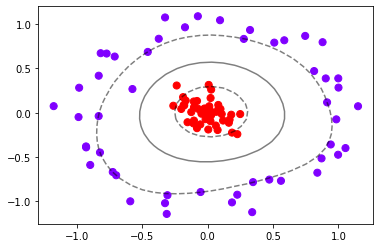

In [2]:
clf = SVC(kernel = "rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

可以看到，决策边界被完美地找了出来。

#### 2.2.3 探索核函数在不同数据集上的表现

除了"linear"以外的核函数都能够处理非线性情况，那究竟什么时候选择哪一个核函数呢？遗憾的是，关于核函数
在不同数据集上的研究甚少，谷歌学术上的论文中也没有几篇是研究核函数在SVM中的运用的，更多的是关于核函
数在深度学习，神经网络中如何使用。在sklearn中，也没有提供任何关于如何选取核函数的信息。<br>
<br>
但无论如何，我们还是可以通过在不同的核函数中循环去找寻最佳的核函数来对核函数进行一个选取。接下来我们
就通过一个例子，来探索一下不同数据集上核函数的表现。我们现在有一系列线性或非线性可分的数据，我们希望
通过绘制SVC在不同核函数下的决策边界并计算SVC在不同核函数下分类准确率来观察核函数的效用。

**1、导入需要的模块和库**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification

**2. 创建数据集，定义核函数的选择**

In [4]:
n_samples = 100

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples,n_features=2,n_informative=2,n_redundant=0, random_state=5)
]

In [5]:
Kernel = ["linear","poly","rbf","sigmoid"]

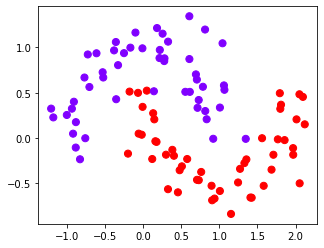

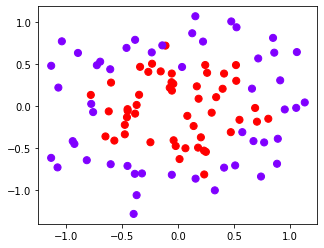

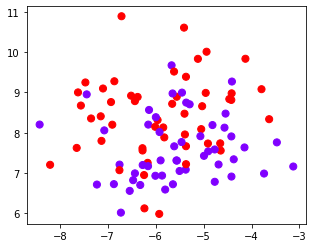

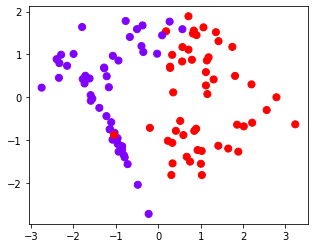

In [6]:
#四个数据集分别是什么样子呢？
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")

我们总共有四个数据集，四种核函数，我们希望观察每种数据集下每个核函数的表现。以核函数为列，以图像分布
为行，我们总共需要16个子图来展示分类结果。而同时，我们还希望观察图像本身的状况，所以我们总共需要20
个子图，其中第一列是原始图像分布，后面四列分别是这种分布下不同核函数的表现。

**3. 构建子图**

In [7]:
nrows=len(datasets)
ncols=len(Kernel) + 1

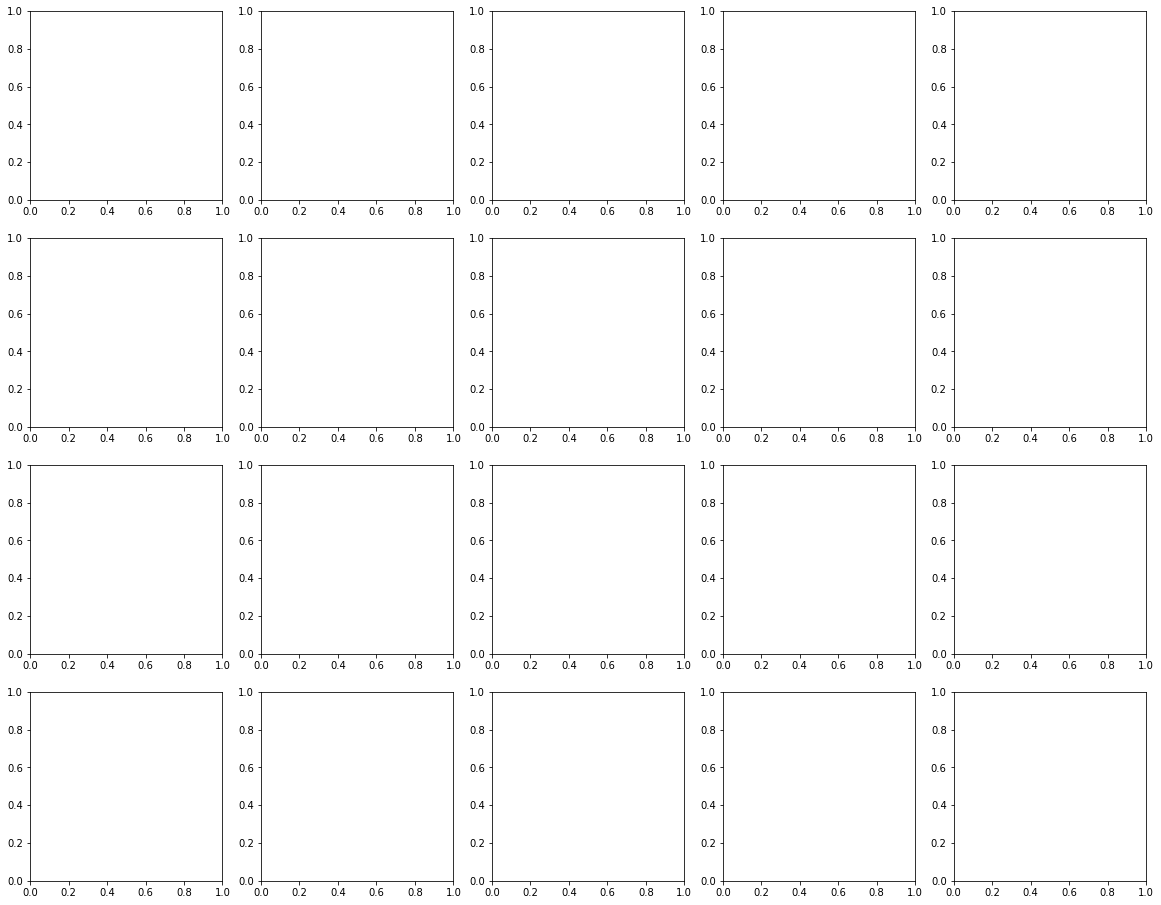

In [8]:
fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))

**4. 开始进行子图循环**

In [9]:
[*enumerate(datasets)]
#index,(X,Y) = 【（索引，array（【特征矩阵X，标签Y】））】

[(0,
  (array([[-1.09443462e-02,  9.89784876e-01],
          [ 1.96749886e+00, -1.10921978e-01],
          [ 9.18923151e-01, -7.87831621e-03],
          [-1.97813183e-02,  3.67422878e-02],
          [ 8.97047211e-01, -5.26043067e-01],
          [ 2.05087697e+00,  4.82966687e-01],
          [ 5.52592656e-01,  5.10008493e-01],
          [ 9.36108682e-01, -6.67176177e-01],
          [-8.57905150e-03,  3.44030710e-01],
          [ 1.79962867e+00,  3.22578165e-01],
          [-1.79739813e-01,  5.12417381e-01],
          [ 1.96928635e+00, -1.84060982e-01],
          [ 1.40757108e+00, -6.55885144e-01],
          [ 1.04103920e+00,  1.04537944e+00],
          [ 6.11861752e-01,  5.09315861e-01],
          [-3.59476500e-01,  1.05930036e+00],
          [ 2.54029695e-01,  1.15116524e+00],
          [ 2.13555501e-01,  8.82321641e-01],
          [-3.30880800e-01,  8.04221145e-01],
          [ 1.06603845e+00,  5.32174106e-01],
          [-7.06988363e-01,  5.63246401e-01],
          [ 4.02928450e-01, -

In [10]:
[*enumerate(Kernel)]

[(0, 'linear'), (1, 'poly'), (2, 'rbf'), (3, 'sigmoid')]

e:\python\python37\lib\site-packages\ipykernel_launcher.py:51: UserWarning: No contour levels were found within the data range.


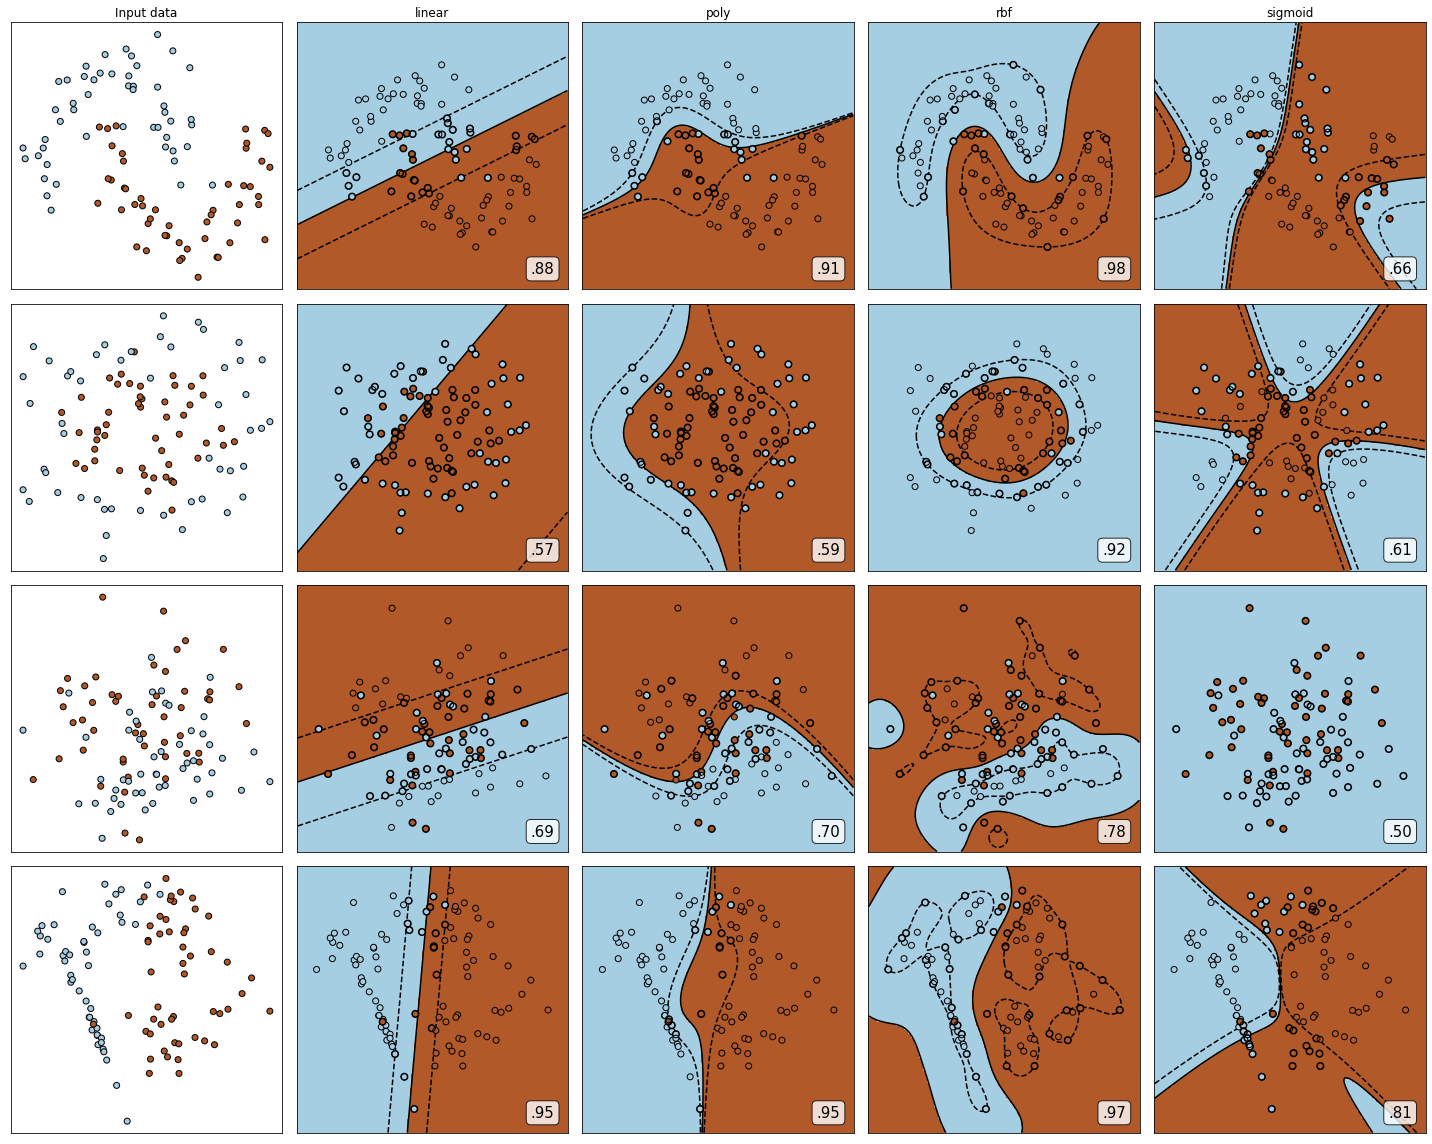

In [14]:
nrows=len(datasets)
ncols=len(Kernel) + 1

fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))

#第一层循环：在不同的数据集中循环
for ds_cnt, (X,Y) in enumerate(datasets):
    
    #在图像中的第一列，放置原数据的分布
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    
    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):
        
        #定义子图位置
        ax = axes[ds_cnt, est_idx + 1]
        
        #建模
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        
        #绘制图像本身分布的散点图
        ax.scatter(X[:, 0], X[:, 1], c=Y
                   ,zorder=10
                   ,cmap=plt.cm.Paired,edgecolors='k')
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
                    facecolors='none', zorder=10, edgecolors='k')
        
        #绘制决策边界
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        
        #np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
        #一次性使用最大值和最小值来生成网格
        #表示为[起始值：结束值：步长]
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        #np.c_，类似于np.vstack的功能
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0,shading='auto', cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-1, 0, 1])
        
        #设定坐标轴为不显示
        ax.set_xticks(())
        ax.set_yticks(())
        
        #将标题放在第一行的顶上
        if ds_cnt == 0:
            ax.set_title(kernel)
            
        #为每张图添加分类的分数  
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
               , size=15
               , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
               #为分数添加一个白色的格子作为底色
               , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
               , horizontalalignment='right' #位于坐标轴的什么方向
               )
plt.tight_layout()
plt.show()

可以观察到，线性核函数和多项式核函数在非线性数据上表现会浮动，如果数据相对线性可分，则表现不错，如果
是像环形数据那样彻底不可分的，则表现糟糕。在线性数据集上，线性核函数和多项式核函数即便有扰动项也可以
表现不错，可见多项式核函数是虽然也可以处理非线性情况，但更偏向于线性的功能。<br>
<br>
Sigmoid核函数就比较尴尬了，它在非线性数据上强于两个线性核函数，但效果明显不如rbf，它在线性数据上完全
比不上线性的核函数们，对扰动项的抵抗也比较弱，所以它功能比较弱小，很少被用到。<br>
<br>
rbf，高斯径向基核函数基本在任何数据集上都表现不错，属于比较万能的核函数。我个人的经验是，无论如何先
试试看高斯径向基核函数，它适用于核转换到很高的空间的情况，在各种情况下往往效果都很不错，如果rbf效果
不好，那我们再试试看其他的核函数。另外，多项式核函数多被用于图像处理之中。

#### 2.2.4 探索核函数的优势和缺陷

看起来，除了Sigmoid核函数，其他核函数效果都还不错。但其实rbf和poly都有自己的弊端，我们使用乳腺癌数据
集作为例子来展示一下：

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
X.shape

(569, 30)

In [4]:
np.unique(y)

array([0, 1])

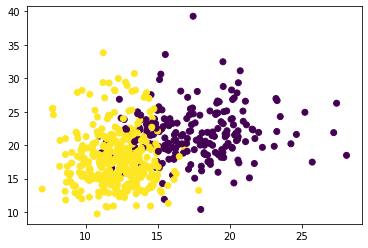

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [6]:
from sklearn.decomposition import PCA

In [7]:
X_dr = PCA(2).fit_transform(X)

In [8]:
X_dr.shape

(569, 2)

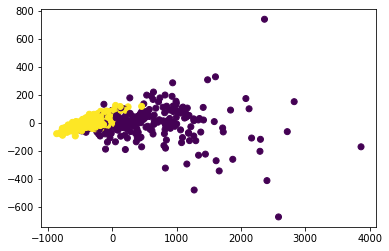

In [9]:
plt.scatter(X_dr[:,0],X_dr[:,1],c=y)
plt.show()

In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [11]:
Kernel = ["linear","poly","rbf","sigmoid"]

In [ ]:
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
            # , degree = 1  #见前核函数截图，表示多项式核函数的次数，默认是非线性的，等于3
             , cache_size=5000 #MB 允许使用多大的内存来进行计算
           ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:945001


然后我们发现，怎么跑都跑不出来。模型一直停留在线性核函数之后，就没有再打印结果了。这证明，多项式核函
数此时此刻要消耗大量的时间，运算非常的缓慢。让我们在循环中去掉多项式核函数，再试试看能否跑出结果：

In [15]:
now = time() #时间戳timesramp

In [19]:
datetime.datetime.fromtimestamp(now).strftime("%Y-%m-%d,%H:%M:%S:%f")

'2021-03-05,16:53:38:970652'

In [20]:
Kernel = ["linear","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
            # , degree = 1
             , cache_size=5000
           ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:890051
The accuracy under kernel rbf is 0.596491
00:00:074004
The accuracy under kernel sigmoid is 0.596491
00:00:011000


我们可以有两个发现。首先，乳腺癌数据集是一个线性数据集，线性核函数跑出来的效果很好。rbf和sigmoid两个擅长非线性的数据从效果上来看完全不可用。其次，线性核函数的运行速度远远不如非线性的两个核函数。<br>
<br>
如果数据是线性的，那如果我们把degree参数调整为1，多项式核函数应该也可以得到不错的结果：

In [21]:
Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
             , cache_size=5000
           ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:932053
The accuracy under kernel poly is 0.923977
00:00:159009
The accuracy under kernel rbf is 0.596491
00:00:080005
The accuracy under kernel sigmoid is 0.596491
00:00:015001


多项式核函数的运行速度立刻加快了，并且精度也提升到了接近线性核函数的水平，可喜可贺。但是，我们之前的
实验中，我们了解说，rbf在线性数据上也可以表现得非常好，那在这里，为什么跑出来的结果如此糟糕呢？<br>
<br>
其实，这里真正的问题是数据的量纲问题。回忆一下我们如何求解决策边界，如何判断点是否在决策边界的一边？
是靠计算”距离“，虽然我们不能说SVM是完全的距离类模型，但是它严重受到数据量纲的影响。让我们来探索一下
乳腺癌数据集的量纲

In [22]:
import pandas as pd
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T
#量纲不统一
#偏态问题

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


一眼望去，果然数据存在严重的量纲不一的问题。我们来使用数据预处理中的标准化的类，对数据进行标准化：

In [23]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.153111e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.568462e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-6.993039e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.553985e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.081447e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.136369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-2.997017e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,1.023981e-15,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.860648e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.504752e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


标准化完毕后，再次让SVC在核函数中遍历，此时我们把degree的数值设定为1，观察各个核函数在去量纲后的数
据上的表现：

In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
             , cache_size=5000
           ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.976608
00:00:018001
The accuracy under kernel poly is 0.964912
00:00:008001
The accuracy under kernel rbf is 0.970760
00:00:015001
The accuracy under kernel sigmoid is 0.953216
00:00:010000


量纲统一之后，可以观察到，所有核函数的运算时间都大大地减少了，尤其是对于线性核来说，而多项式核函数居
然变成了计算最快的。其次，rbf表现出了非常优秀的结果。经过我们的探索，我们可以得到的结论是：<br>
<br>
**1. 线性核，尤其是多项式核函数在高次项时计算非常缓慢<br>2. rbf和多项式核函数都不擅长处理量纲不统一的数据集**<br>
<br>
幸运的是，这两个缺点都可以由数据无量纲化来解决。因此，**SVM执行之前，非常推荐先进行数据的无量纲化！** 到
了这一步，我们是否已经完成建模了呢？虽然线性核函数的效果是最好的，但它是没有核函数相关参数可以调整
的，rbf和多项式却还有着可以调整的相关参数，接下来我们就来看看这些参数

#### 2.2.5 选取与核函数相关的参数：degree & gamma & coef0

![image.png](./images/208.png)

![image.png](./images/209.png)

In [25]:
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字

In [26]:
gamma_range

array([1.00000000e-10, 1.67683294e-10, 2.81176870e-10, 4.71486636e-10,
       7.90604321e-10, 1.32571137e-09, 2.22299648e-09, 3.72759372e-09,
       6.25055193e-09, 1.04811313e-08, 1.75751062e-08, 2.94705170e-08,
       4.94171336e-08, 8.28642773e-08, 1.38949549e-07, 2.32995181e-07,
       3.90693994e-07, 6.55128557e-07, 1.09854114e-06, 1.84206997e-06,
       3.08884360e-06, 5.17947468e-06, 8.68511374e-06, 1.45634848e-05,
       2.44205309e-05, 4.09491506e-05, 6.86648845e-05, 1.15139540e-04,
       1.93069773e-04, 3.23745754e-04, 5.42867544e-04, 9.10298178e-04,
       1.52641797e-03, 2.55954792e-03, 4.29193426e-03, 7.19685673e-03,
       1.20679264e-02, 2.02358965e-02, 3.39322177e-02, 5.68986603e-02,
       9.54095476e-02, 1.59985872e-01, 2.68269580e-01, 4.49843267e-01,
       7.54312006e-01, 1.26485522e+00, 2.12095089e+00, 3.55648031e+00,
       5.96362332e+00, 1.00000000e+01])

0.9766081871345029 0.012067926406393264


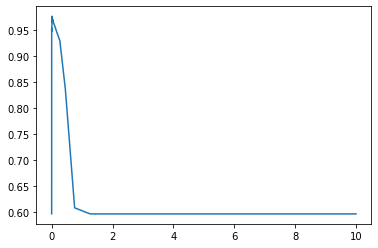

In [27]:
score = []
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

通过学习曲线，很容就找出了rbf的最佳gamma值。但我们观察到，这其实与线性核函数的准确率一模一样之前的
准确率。我们可以多次调整gamma_range来观察结果，可以发现97.6608应该是rbf核函数的极限了。<br>
<br>
但对于多项式核函数来说，一切就没有那么容易了，因为三个参数共同作用在一个数学公式上影响它的效果，因此
我们往往使用网格搜索来共同调整三个对多项式核函数有影响的参数。依然使用乳腺癌数据集。

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

time0 = time()

gamma_range = np.logspace(-10,1,20)
coef0_range = np.linspace(0,5,10)

param_grid = dict(gamma = gamma_range
                 ,coef0 = coef0_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420)
grid = GridSearchCV(SVC(kernel = "poly",degree=1,cache_size=5000),param_grid=param_grid, cv=cv)

grid.fit(X, y)

print("The best parameters are %s with a score of %0.5f" % (grid.best_params_,grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The best parameters are {'coef0': 0.0, 'gamma': 0.18329807108324375} with a score of 0.96959
00:12:584720


可以发现，网格搜索为我们返回了参数coef0=0，gamma=0.18329807108324375，但整体的分数是0.96959，虽
然比调参前略有提高，但依然没有超过线性核函数核rbf的结果。可见，如果最初选择核函数的时候，你就发现多
项式的结果不如rbf和线性核函数，那就不要挣扎了，试试看调整rbf或者直接使用线性。

### 2.3 硬间隔与软间隔：重要参数C

#### 2.3.1 SVM在软间隔数据上的推广

![image.png](./images/210.png)

![image.png](./images/211.png)

![image.png](./images/212.png)

![image.png](./images/213.png)

#### 2.3.2 重要参数C

![image.png](./images/214.png)

0.9766081871345029 0.2136734693877551


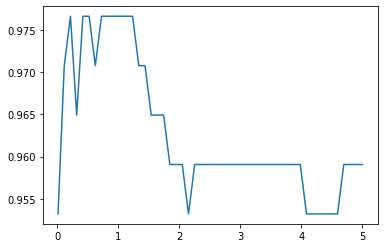

In [31]:
#调线性核函数
score = []
C_range = np.linspace(0.01,5,50)
for i in C_range:
    clf = SVC(kernel="linear",C=i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9824561403508771 6.130408163265306


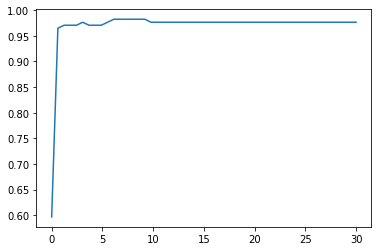

In [32]:
#换rbf
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma=0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9824561403508771 5.938775510204081


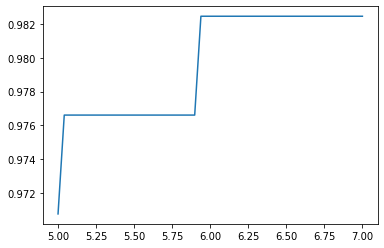

In [33]:
#进一步细化
score = []
C_range = np.linspace(5,7,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma=0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

此时，我们找到了乳腺癌数据集上的最优解：rbf核函数下的98.24%的准确率。当然，我们还可以使用交叉验证来
改进我们的模型，获得不同测试集和训练集上的交叉验证结果。但上述过程，为大家展现了如何选择正确的核函
数，以及如何调整核函数的参数，过程虽然简单，但是希望可以对大家有所启发。

### 2.4总结

讲解了支持向量机的原理，介绍了支持向量机的损失函数，拉格朗日函数，拉格朗日对偶函数，
预测函数以及这些函数在非线性，软间隔这些情况上的推广。我们介绍了四种核函数，包括它们的特点，适合什么
样的数据，有什么相关参数，优缺点，以及什么时候使用。最后我们还讲解了核函数在相关参数上的调参。本节课
的内容非常多，但我们对SVM的探索还远远没有结束。下一周我们会继续讲解SVM，包括SVC的模型评价指标，
SVC使用中的其他重要参数，重要属性和接口，以及其他重要问题，当然还有案例。希望大家尽力消化这一周的内
容，SVC的探索道路依然任重而道远。